# Importing packages

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

# Ignore deprecation and other warnings
import warnings
warnings.filterwarnings("ignore")

# Display options
np.set_printoptions(precision=3, suppress=True)


# Data exploration

In [3]:
Crema = "CREMA-D/AudioWAV/"
Savee = "SAVEE/ALL/"


In [4]:
crema_directory_list = os.listdir(Crema)

In [5]:


file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav


In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,SAVEE/ALL/DC_a01.wav
1,angry,SAVEE/ALL/DC_a02.wav
2,angry,SAVEE/ALL/DC_a03.wav
3,angry,SAVEE/ALL/DC_a04.wav
4,angry,SAVEE/ALL/DC_a05.wav


In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Crema_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav


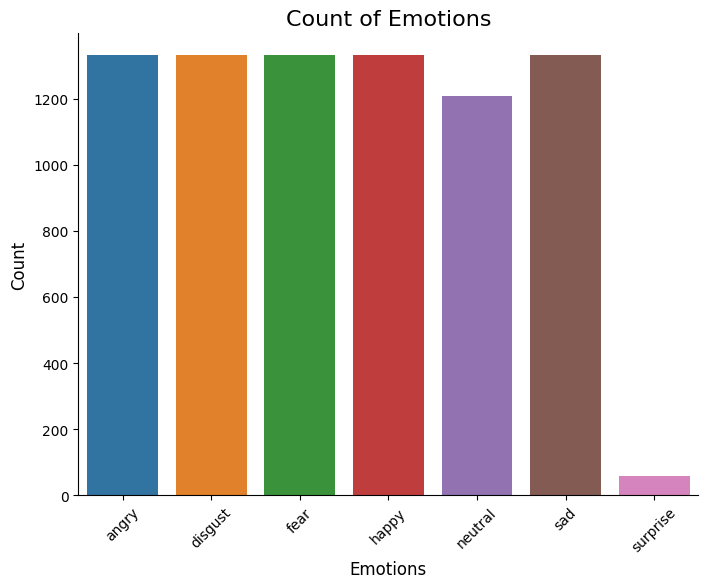

In [8]:
plt.figure(figsize=(8, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [9]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

def create_waveplot(audio_data, sample_rate, emotion):
    """
    Create a waveplot for audio data.

    Parameters:
        audio_data (np.ndarray): Audio data.
        sample_rate (int): Sampling rate of the audio.
        emotion (str): Emotion associated with the audio.

    Returns:
        None
    """
    plt.figure(figsize=(10, 3))
    plt.plot(audio_data)
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    plt.show()

def create_spectrogram(audio_data, sample_rate, emotion):
    """
    Create a spectrogram for audio data.

    Parameters:
        audio_data (np.ndarray): Audio data.
        sample_rate (int): Sampling rate of the audio.
        emotion (str): Emotion associated with the audio.

    Returns:
        None
    """
    # Compute short-time Fourier transform (STFT)
    X = librosa.stft(audio_data)
    Xdb = librosa.amplitude_to_db(abs(X))
    
    # Plot the spectrogram
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')   
    plt.colorbar()
    plt.show()


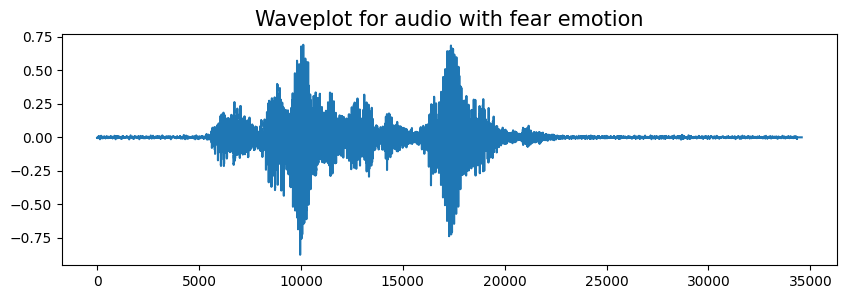

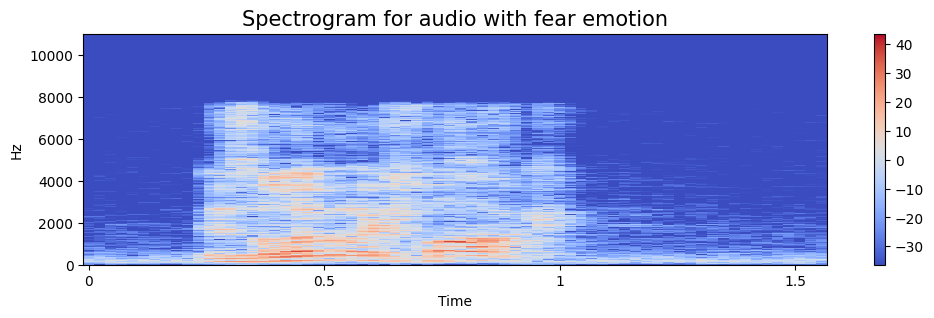

In [10]:
# Define the emotion for which you want to create waveplot and spectrogram
emotion = 'fear'

# Get the path of an audio file corresponding to the specified emotion
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]

# Load the audio data and its sampling rate using librosa
data, sampling_rate = librosa.load(path)

# Create a waveplot for the audio data
create_waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the audio data
create_spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


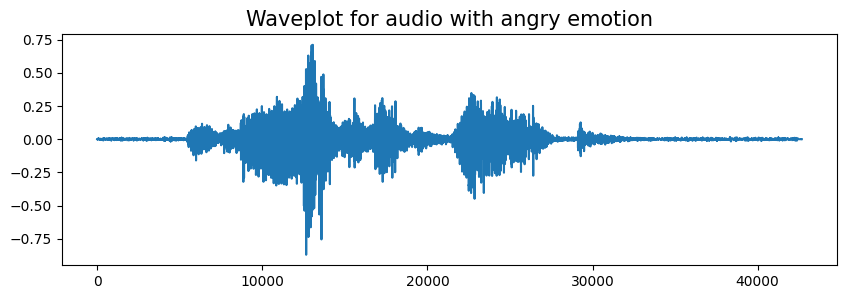

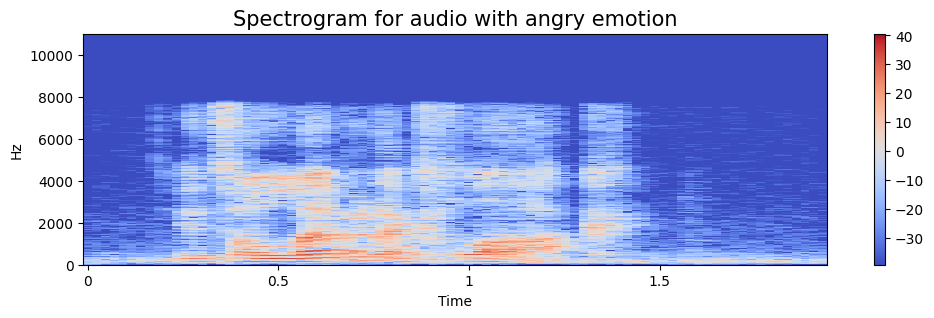

In [12]:
# we do the same for all other emotions
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

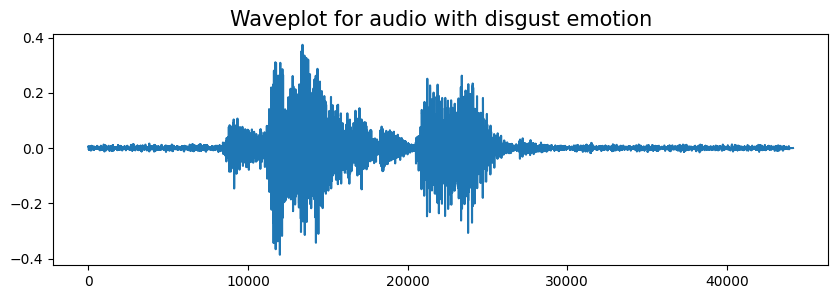

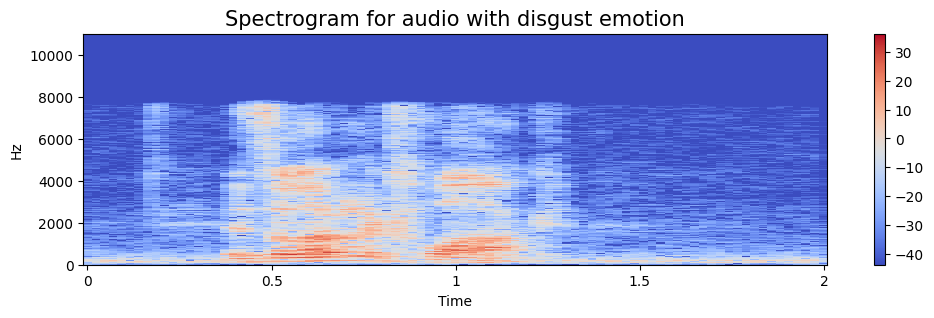

In [13]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

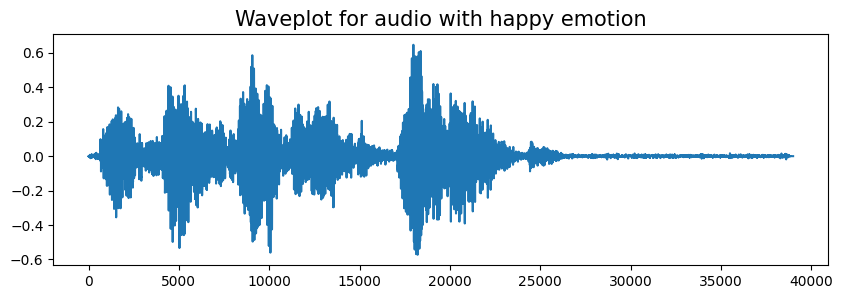

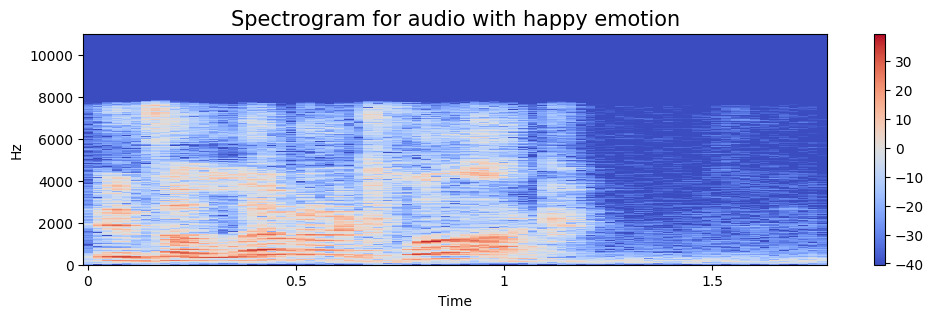

In [14]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

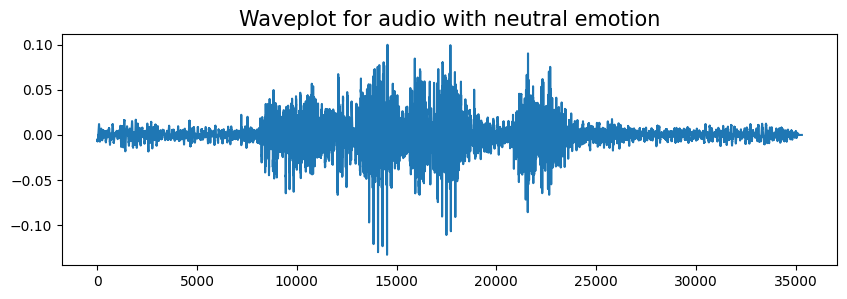

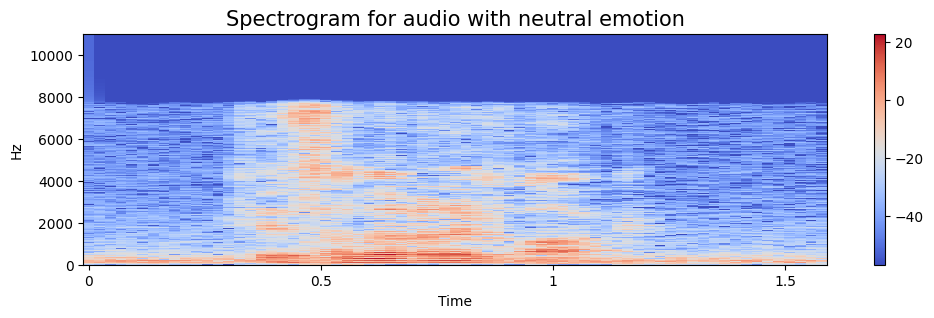

In [15]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

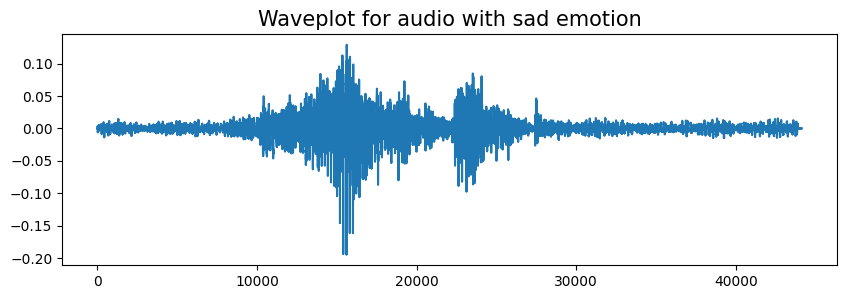

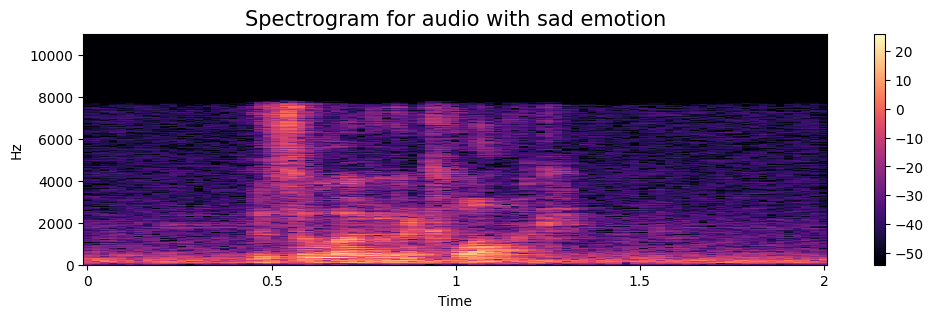

In [16]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [17]:
# Function to add noise to audio data
def noise(data):
    # Calculate noise amplitude based on a fraction of the maximum amplitude of the data
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    # Add Gaussian noise to the data
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

# Function to stretch audio data in time
def stretch(data, rate=0.8):
    # Apply time stretching effect to the data
    return librosa.effects.time_stretch(data, rate=rate)

# Function to shift audio data in time
def shift(data):
    # Generate a random shift range
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    # Shift the data in time
    return np.roll(data, shift_range)

# Function to pitch shift audio data
def pitch(data, sampling_rate, pitch_factor=0.7):
    # Apply pitch shifting effect to the data
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# Example usage:
# Load audio data from a file path
path = data_path.Path.iloc[0]  # Selecting the first path from the data_path DataFrame
data, sample_rate = librosa.load(path)


<Figure size 1400x400 with 0 Axes>

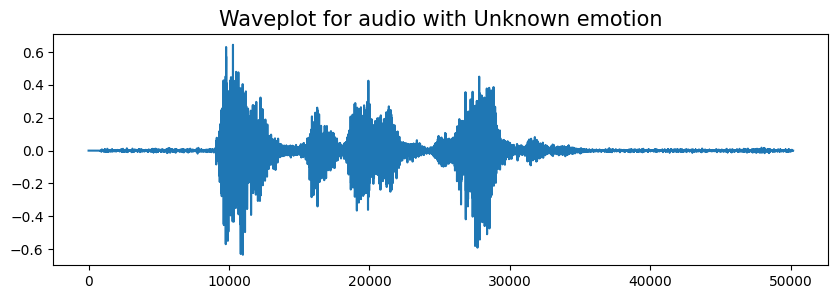

In [18]:
# Simple Audio
plt.figure(figsize=(14,4))
create_waveplot(data, sample_rate,e='Unknown')
Audio(path)

<Figure size 1400x400 with 0 Axes>

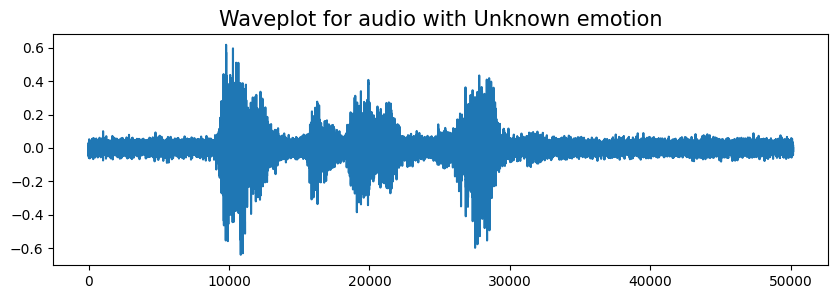

In [19]:
# Noise injection
x = noise(data)
plt.figure(figsize=(14,4))
create_waveplot(x, sample_rate,e='Unknown')
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

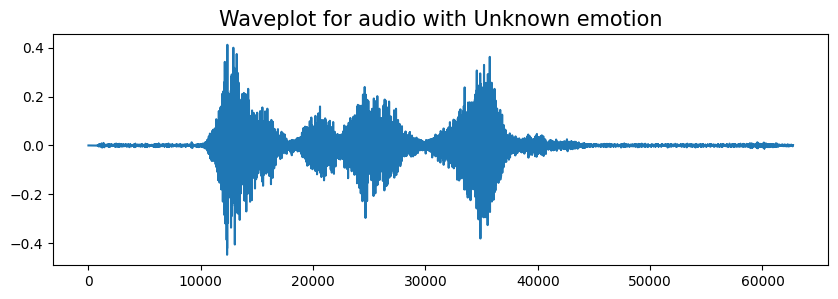

In [20]:
# Stretching
x = stretch(data)
plt.figure(figsize=(14,4))
create_waveplot(x, sample_rate,e='Unknown')
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

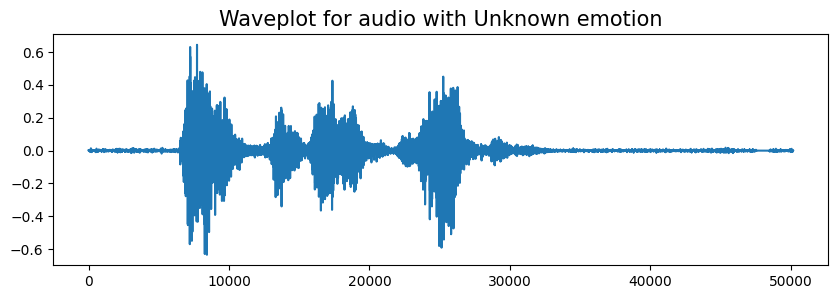

In [21]:
# Shifting
x = shift(data)
plt.figure(figsize=(14,4))
create_waveplot(x, sample_rate,e='Unknown')
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

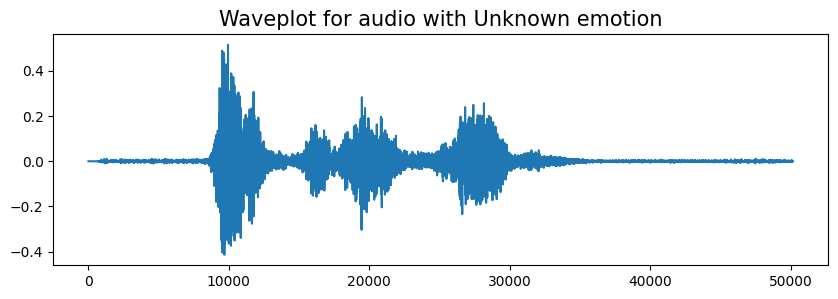

In [22]:
# Pitching
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
create_waveplot(x, sample_rate,e='Unknown')
Audio(x, rate=sample_rate)

# Feature extraction

In the feature extraction phase, we aim to transform raw audio data into a set of meaningful features that capture relevant information about the audio signals. This process plays a crucial role in preparing the data for subsequent analysis and modeling. Leveraging the powerful librosa library, we extract a diverse range of acoustic features, including Zero Crossing Rate (ZCR), Chroma_stft, Mel-frequency cepstral coefficients (MFCC), Root Mean Square (RMS) Value, and Mel Spectrogram. These features provide valuable insights into the temporal and spectral characteristics of the audio signals, enabling our emotion recognition system to effectively discern patterns associated with different emotional states. Moreover, we apply various data augmentation techniques, such as noise addition, time stretching, and pitch shifting, to enhance the robustness and generalization capabilities of our model. By incorporating these augmented features, we enrich the diversity of our training data, facilitating better model performance across a wider range of scenarios.

In [23]:
# Function to extract audio features from the input data
def extract_features(data):
    """
    Extracts audio features from the input data.

    Parameters:
        data (np.ndarray): Input audio data.

    Returns:
        np.ndarray: Extracted audio features.
    """
    # Zero Crossing Rate (ZCR)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Mel-frequency cepstral coefficients (MFCC)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square (RMS) Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

# Function to extract features from audio file
def get_features(path):
    """
    Extracts features from the audio file located at the given path.

    Parameters:
        path (str): Path to the audio file.

    Returns:
        np.ndarray: Extracted features.
    """
    # Load audio data with specified duration and offset
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Extract features without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # Extract features from data with added noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # Extract features from data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result


In [24]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [25]:
len(X), len(Y), data_path.Path.shape

(23766, 23766, (7922,))

In [26]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.085690,0.671934,0.694386,0.672386,0.675260,0.674322,0.579565,0.578604,0.647424,0.650719,...,6.261535e-08,5.799611e-08,5.473501e-08,5.232019e-08,5.053353e-08,4.925763e-08,4.833769e-08,4.774562e-08,4.738036e-08,angry
1,0.266602,0.776809,0.749944,0.765892,0.780598,0.812604,0.685433,0.629548,0.688986,0.686606,...,3.356241e-03,3.432318e-03,3.378998e-03,3.435331e-03,3.352833e-03,3.259533e-03,3.469904e-03,3.350706e-03,3.307673e-03,angry
2,0.093428,0.636515,0.615982,0.635541,0.683582,0.709473,0.584347,0.544490,0.627884,0.614110,...,5.421565e-08,4.762177e-08,4.319623e-08,3.999700e-08,3.765626e-08,3.605933e-08,3.509663e-08,2.803464e-08,1.090318e-08,angry
3,0.078444,0.718596,0.729192,0.653268,0.665332,0.687527,0.602966,0.577669,0.618406,0.681478,...,4.336244e-07,4.003988e-07,3.764672e-07,3.584461e-07,3.449016e-07,3.350527e-07,3.278495e-07,3.231356e-07,3.202182e-07,disgust
4,0.198099,0.813157,0.799000,0.757931,0.788342,0.808477,0.686183,0.636506,0.683742,0.715700,...,8.428783e-04,7.789473e-04,8.544150e-04,8.104433e-04,8.662339e-04,8.736572e-04,8.971635e-04,8.936213e-04,8.072363e-04,disgust


# Data preparation

In [27]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [28]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [29]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17824, 162), (17824, 7), (5942, 162), (5942, 7))

In [30]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17824, 162), (17824, 7), (5942, 162), (5942, 7))

In [52]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17824, 162, 1, 1), (17824, 7), (5942, 162, 1, 1), (5942, 7))

# Modeling

## CNN model

In [22]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)         

In [58]:
# now lets train our model
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100


557/557 [==============================] - 20s 32ms/step - loss: 1.6797 - accuracy: 0.2966 - val_loss: 1.5656 - val_accuracy: 0.3361
Epoch 2/100
557/557 [==============================] - 17s 31ms/step - loss: 1.5766 - accuracy: 0.3362 - val_loss: 1.5327 - val_accuracy: 0.3564
Epoch 3/100
557/557 [==============================] - 17s 31ms/step - loss: 1.5468 - accuracy: 0.3553 - val_loss: 1.4962 - val_accuracy: 0.3819
Epoch 4/100
557/557 [==============================] - 17s 31ms/step - loss: 1.5248 - accuracy: 0.3609 - val_loss: 1.4817 - val_accuracy: 0.3810
Epoch 5/100
557/557 [==============================] - 17s 31ms/step - loss: 1.5079 - accuracy: 0.3689 - val_loss: 1.4667 - val_accuracy: 0.4004
Epoch 6/100
557/557 [==============================] - 17s 31ms/step - loss: 1.4970 - accuracy: 0.3756 - val_loss: 1.4556 - val_accuracy: 0.3856
Epoch 7/100
557/557 [==============================] - 17s 31ms/step - loss: 1.4800 - accuracy: 0.3811 - val_loss: 1.4305 - val_

In [66]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']



186/186 [==============================] - 2s 12ms/step - loss: 1.6114 - accuracy: 0.4670
Accuracy of our model on test data :  46.701446175575256 %


<Figure size 640x480 with 0 Axes>

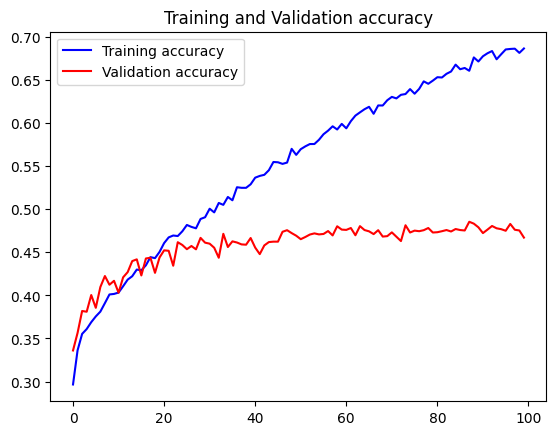

<Figure size 640x480 with 0 Axes>

In [67]:
# let's plot the training and validation accuracy
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()


In [68]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

186/186 [==============================] - 3s 12ms/step


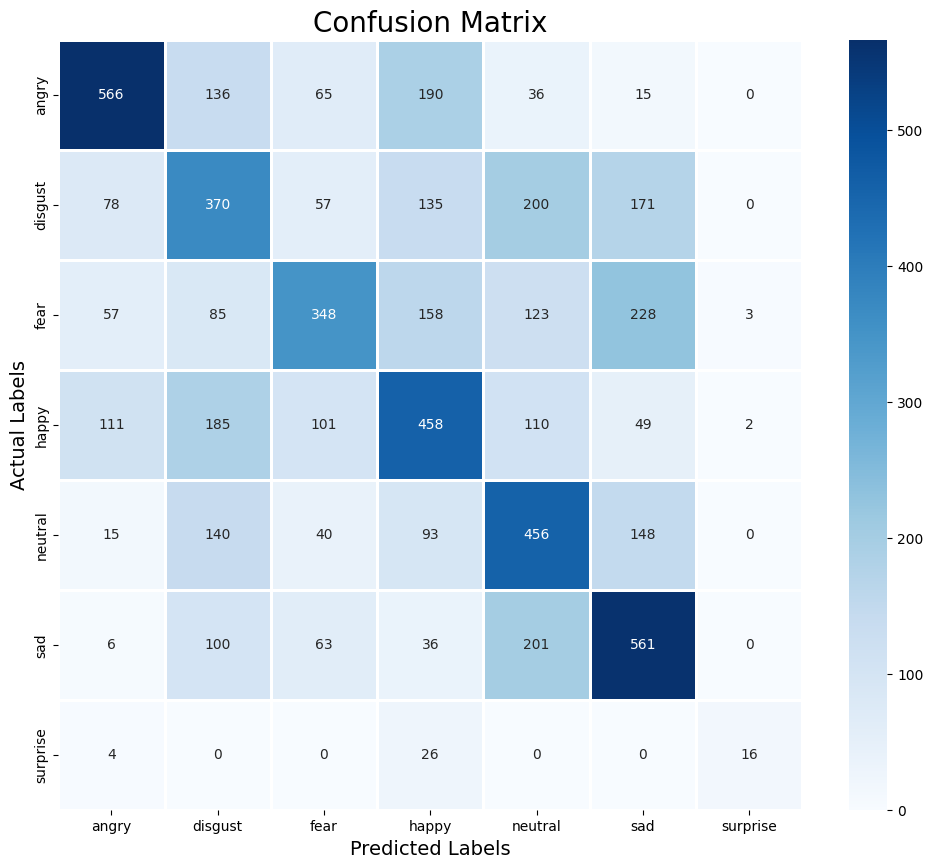

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.68      0.56      0.61      1008
     disgust       0.36      0.37      0.37      1011
        fear       0.52      0.35      0.42      1002
       happy       0.42      0.45      0.43      1016
     neutral       0.40      0.51      0.45       892
         sad       0.48      0.58      0.52       967
    surprise       0.76      0.35      0.48        46

    accuracy                           0.47      5942
   macro avg       0.52      0.45      0.47      5942
weighted avg       0.48      0.47      0.47      5942



### Enhancement of the Initial Model

Let's try and add more augmentation methods

In [46]:
# Function to add random noise to the input audio data
def noise(data):
    """
    Add random noise to the input audio data.

    Parameters:
        data (np.ndarray): Input audio data.

    Returns:
        np.ndarray: Audio data with added noise.
    """
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

# Function to stretch the input audio data in time
def stretch(data, rate=0.8):
    """
    Stretch the input audio data in time.

    Parameters:
        data (np.ndarray): Input audio data.
        rate (float): Stretching rate (default is 0.8).

    Returns:
        np.ndarray: Stretched audio data.
    """
    return librosa.effects.time_stretch(data, rate=rate)

# Function to shift the input audio data in time
def shift(data):
    """
    Shift the input audio data in time.

    Parameters:
        data (np.ndarray): Input audio data.

    Returns:
        np.ndarray: Shifted audio data.
    """
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

# Function to pitch-shift the input audio data
def pitch(data, sampling_rate, pitch_factor=0.7):
    """
    Pitch-shift the input audio data.

    Parameters:
        data (np.ndarray): Input audio data.
        sampling_rate (int): Sampling rate of the audio data.
        pitch_factor (float): Pitch-shifting factor (default is 0.7).

    Returns:
        np.ndarray: Pitch-shifted audio data.
    """
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# Example usage:
# Load audio data from a file path
path = data_path.Path.iloc[0]  # Selecting the first path from the data_path DataFrame
data, sample_rate = librosa.load(path)


In [47]:
# Function to extract audio features from the input data
def extract_features(data):
    """
    Extracts audio features from the input data.

    Parameters:
        data (np.ndarray): Input audio data.

    Returns:
        np.ndarray: Extracted audio features.
    """
    # Zero Crossing Rate (ZCR)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # Mel-frequency cepstral coefficients (MFCC)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square (RMS) Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally
    
    return result

# Function to extract features from audio file
def get_features(path):
    """
    Extracts features from the audio file located at the given path.

    Parameters:
        path (str): Path to the audio file.

    Returns:
        np.ndarray: Extracted features.
    """
    # Load audio data with specified duration and offset
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Extract features without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # Extract features from data with added noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically
    
    # Extract features from data with time stretching
    stretched_data = stretch(data)
    res3 = extract_features(stretched_data)
    result = np.vstack((result, res3))  # stacking vertically

    # Extract features from data with pitch shifting
    pitched_data = pitch(data, sample_rate)
    res4 = extract_features(pitched_data)
    result = np.vstack((result, res4))  # stacking vertically

    # Extract features from data with time shifting
    shifted_data = shift(data)
    res5 = extract_features(shifted_data)
    result = np.vstack((result, res5))  # stacking vertically
    
    return result


In [74]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [75]:
len(X), len(Y), data_path.Path.shape

(39610, 39610, (7922,))

In [76]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.085690,0.671934,0.694386,0.672386,0.675260,0.674322,0.579565,0.578604,0.647424,0.650719,...,6.261535e-08,5.799611e-08,5.473501e-08,5.232019e-08,5.053353e-08,4.925763e-08,4.833769e-08,4.774562e-08,4.738036e-08,angry
1,0.228101,0.748713,0.752583,0.759568,0.781488,0.783070,0.634617,0.611720,0.691932,0.677109,...,1.282829e-03,1.540527e-03,1.499917e-03,1.441930e-03,1.474882e-03,1.421819e-03,1.514393e-03,1.446507e-03,1.321471e-03,angry
2,0.087011,0.669836,0.667529,0.644506,0.662008,0.684189,0.587950,0.573317,0.647922,0.634995,...,5.473816e-08,5.084009e-08,4.808351e-08,4.603738e-08,4.452076e-08,4.343701e-08,4.265431e-08,4.215051e-08,4.183899e-08,angry
3,0.089309,0.783139,0.662715,0.664282,0.647730,0.680278,0.656678,0.528550,0.527493,0.628647,...,6.756346e-08,5.978190e-08,5.463879e-08,5.104975e-08,4.858695e-08,4.716790e-08,4.698927e-08,4.042392e-08,2.038010e-08,angry
4,0.085576,0.677780,0.684263,0.670362,0.664167,0.676721,0.578152,0.568625,0.636695,0.650184,...,1.166827e-07,1.110772e-07,1.069794e-07,1.037893e-07,1.013162e-07,9.949567e-08,9.812464e-08,9.722547e-08,9.664725e-08,angry


In [77]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [78]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [79]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29707, 162), (29707, 7), (9903, 162), (9903, 7))

In [80]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29707, 162), (29707, 7), (9903, 162), (9903, 7))

In [81]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29707, 162, 1), (29707, 7), (9903, 162, 1), (9903, 7))

In [23]:
# now lets train our model with our new data
history_a = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100


929/929 [==============================] - 35s 36ms/step - loss: 1.6182 - accuracy: 0.3221 - val_loss: 1.5100 - val_accuracy: 0.3509
Epoch 2/100
929/929 [==============================] - 33s 36ms/step - loss: 1.5111 - accuracy: 0.3741 - val_loss: 1.4318 - val_accuracy: 0.4045
Epoch 3/100
929/929 [==============================] - 34s 37ms/step - loss: 1.4708 - accuracy: 0.3901 - val_loss: 1.4030 - val_accuracy: 0.4085
Epoch 4/100
929/929 [==============================] - 32s 35ms/step - loss: 1.4422 - accuracy: 0.4037 - val_loss: 1.3775 - val_accuracy: 0.4329
Epoch 5/100
929/929 [==============================] - 32s 35ms/step - loss: 1.4149 - accuracy: 0.4178 - val_loss: 1.3710 - val_accuracy: 0.4359
Epoch 6/100
929/929 [==============================] - 32s 34ms/step - loss: 1.3914 - accuracy: 0.4290 - val_loss: 1.3323 - val_accuracy: 0.4555
Epoch 7/100
929/929 [==============================] - 31s 33ms/step - loss: 1.3734 - accuracy: 0.4407 - val_loss: 1.3309 - val_

In [24]:
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

epochs = [i for i in range(100)]
train_acc = history_a.history['accuracy']  
train_loss = history_a.history['loss']
test_acc = history_a.history['val_accuracy'] 
test_loss = history_a.history['val_loss']


310/310 [==============================] - 3s 10ms/step - loss: 1.2790 - accuracy: 0.6353
Accuracy of our model on test data: 63.526201248168945 %


<Figure size 640x480 with 0 Axes>

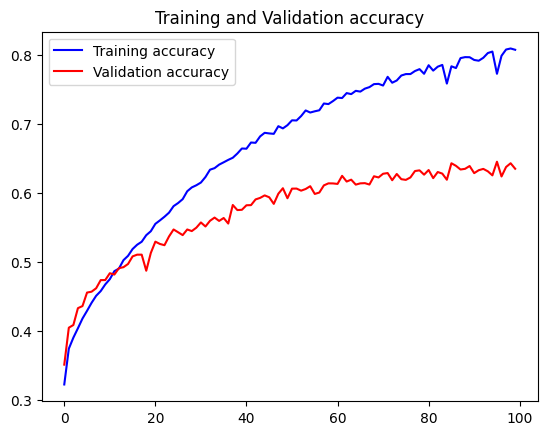

<Figure size 640x480 with 0 Axes>

In [25]:
# let's plot the training and validation accuracy
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()


In [26]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

310/310 [==============================] - 3s 9ms/step


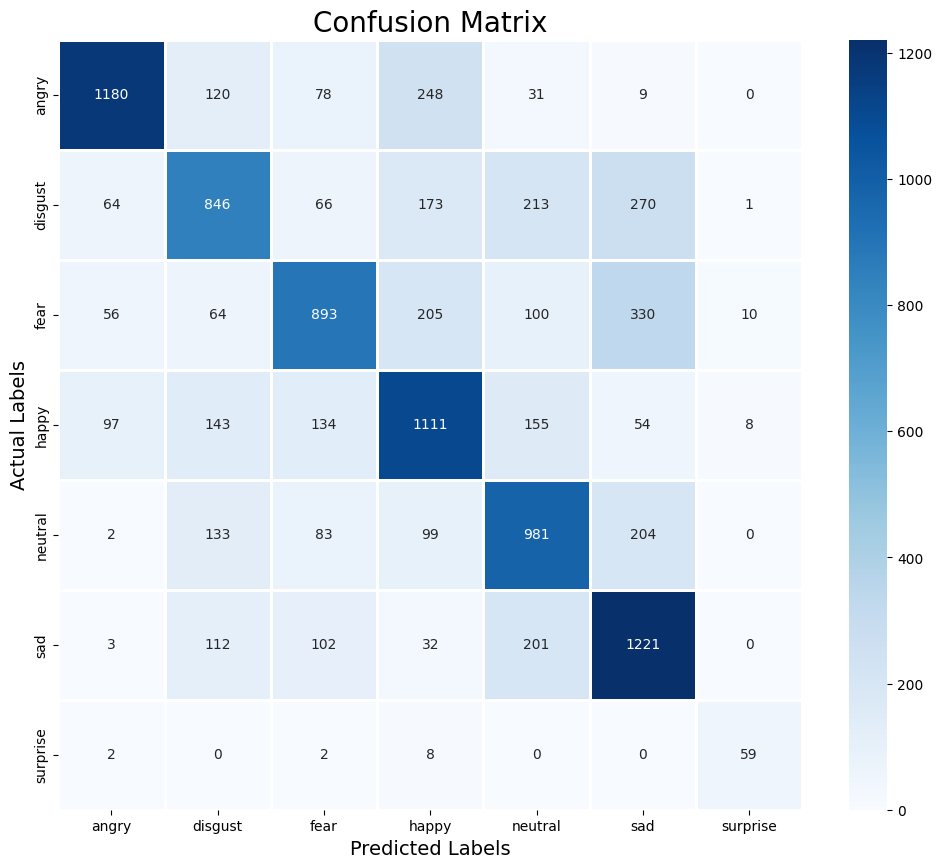

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.84      0.71      0.77      1666
     disgust       0.60      0.52      0.55      1633
        fear       0.66      0.54      0.59      1658
       happy       0.59      0.65      0.62      1702
     neutral       0.58      0.65      0.62      1502
         sad       0.58      0.73      0.65      1671
    surprise       0.76      0.83      0.79        71

    accuracy                           0.64      9903
   macro avg       0.66      0.66      0.66      9903
weighted avg       0.64      0.64      0.64      9903



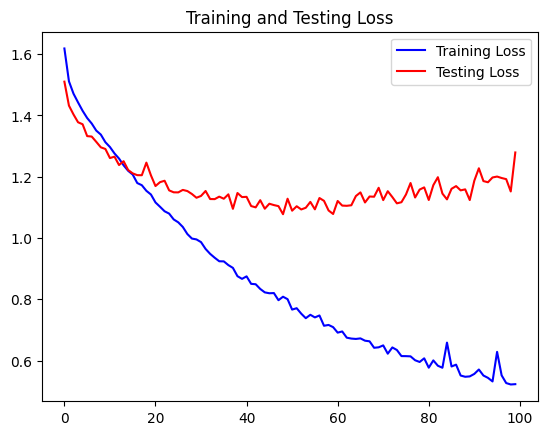

In [29]:
# lets plot the loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()


## LSTM model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_rnn = Sequential()
model_rnn.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_rnn.add(Dropout(0.2))

model_rnn.add(LSTM(256, return_sequences=True))
model_rnn.add(Dropout(0.2))

model_rnn.add(LSTM(128, return_sequences=True))
model_rnn.add(Dropout(0.2))

model_rnn.add(LSTM(64, return_sequences=True))
model_rnn.add(Dropout(0.2))

model_rnn.add(Flatten())
model_rnn.add(Dense(units=32, activation='relu'))
model_rnn.add(Dropout(0.3))

model_rnn.add(Dense(units=7, activation='softmax'))

model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_rnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 162, 256)          264192    
                                                                 
 dropout_7 (Dropout)         (None, 162, 256)          0         
                                                                 
 lstm_17 (LSTM)              (None, 162, 256)          525312    
                                                                 
 dropout_8 (Dropout)         (None, 162, 256)          0         
                                                                 
 lstm_18 (LSTM)              (None, 162, 128)          197120    
                                                                 
 dropout_9 (Dropout)         (None, 162, 128)          0         
                                                                 
 lstm_19 (LSTM)              (None, 162, 64)          

In [61]:
# let's train our model
history_rnn = model_rnn.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
929/929 [==============================] - 563s 606ms/step - loss: 0.4466 - accuracy: 0.8231 - val_loss: 0.8337 - val_accuracy: 0.7459
Epoch 2/10
929/929 [==============================] - 535s 576ms/step - loss: 0.4469 - accuracy: 0.8261 - val_loss: 0.8237 - val_accuracy: 0.7501
Epoch 3/10
929/929 [==============================] - 508s 547ms/step - loss: 0.4362 - accuracy: 0.8314 - val_loss: 0.8235 - val_accuracy: 0.7443
Epoch 4/10
929/929 [==============================] - 513s 552ms/step - loss: 0.4304 - accuracy: 0.8330 - val_loss: 0.8134 - val_accuracy: 0.7503
Epoch 5/10
929/929 [==============================] - 8087s 9s/step - loss: 0.4249 - accuracy: 0.8348 - val_loss: 0.8276 - val_accuracy: 0.7561
Epoch 6/10
929/929 [==============================] - 714s 769ms/step - loss: 0.4233 - accuracy: 0.8350 - val_loss: 0.8403 - val_accuracy: 0.7560
Epoch 7/10
929/929 [==============================] - 684s 737ms/step - loss: 0.4124 - accuracy: 0.8407 - val_loss: 0.8194 - v

In [65]:
print("Accuracy of our model on test data:", model_rnn.evaluate(x_test, y_test)[1] * 100, "%")

epochs = [i for i in range(10)]
train_acc = history_rnn.history['accuracy']  
train_loss = history_rnn.history['loss']
test_acc = history_rnn.history['val_accuracy'] 
test_loss = history_rnn.history['val_loss']


310/310 [==============================] - 75s 243ms/step - loss: 0.8336 - accuracy: 0.7581
Accuracy of our model on test data: 75.80531239509583 %


<Figure size 640x480 with 0 Axes>

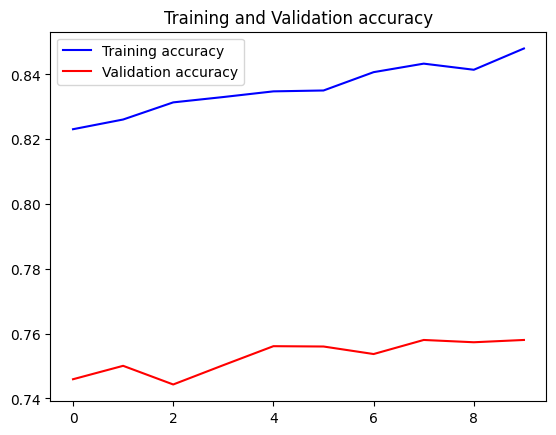

<Figure size 640x480 with 0 Axes>

In [66]:
# let's plot the training and validation accuracy
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()


In [67]:
# predicting on test data.
pred_test = model_rnn.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

310/310 [==============================] - 79s 241ms/step


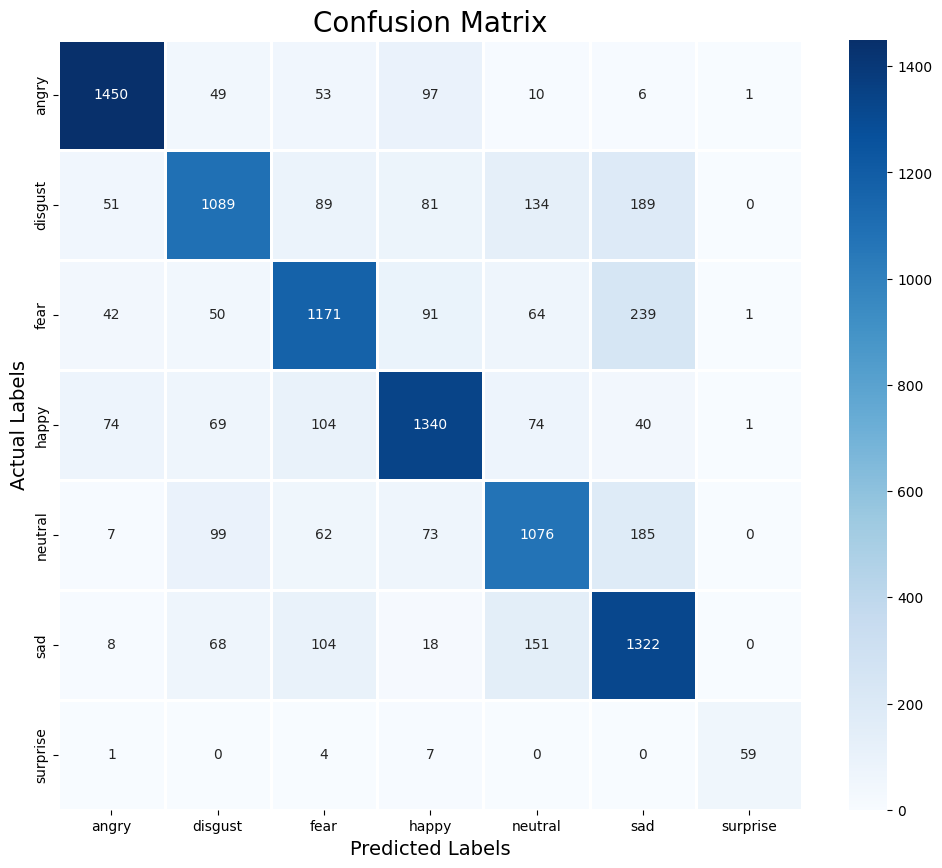

In [68]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.89      0.87      0.88      1666
     disgust       0.76      0.67      0.71      1633
        fear       0.74      0.71      0.72      1658
       happy       0.79      0.79      0.79      1702
     neutral       0.71      0.72      0.71      1502
         sad       0.67      0.79      0.72      1671
    surprise       0.95      0.83      0.89        71

    accuracy                           0.76      9903
   macro avg       0.79      0.77      0.78      9903
weighted avg       0.76      0.76      0.76      9903



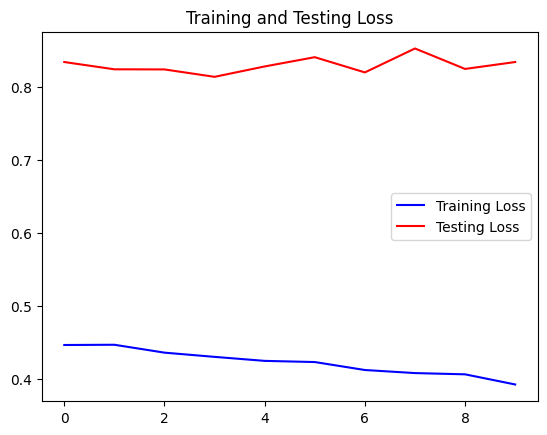

In [70]:
# lets plot the loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()
